In [1]:
train_dir = 'your_path/cats_and_dogs_small/train'
test_dir = 'your_path/cats_and_dogs_small/test'
validation_dir = 'your_path/cats_and_dogs_small/validation'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_gen.flow_from_directory(
    train_dir,
    batch_size=20,
    target_size=(150,150),
    class_mode='binary'
)

val_generator = val_gen.flow_from_directory(
    validation_dir,
    batch_size=20,
    target_size=(150,150),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.keras import layers,models
import tensorflow as tf

In [19]:
conv_model = models.Sequential()

conv_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (150,150,3)))
conv_model.add(layers.MaxPool2D((2,2)))

conv_model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
conv_model.add(layers.MaxPool2D((2,2)))

conv_model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
conv_model.add(layers.MaxPool2D((2,2)))

conv_model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
conv_model.add(layers.MaxPool2D((2,2)))

conv_model.add(layers.Flatten())
conv_model.add(layers.Dense(512, activation='relu'))
conv_model.add(layers.Dense(1,activation='sigmoid'))

In [20]:
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [23]:
conv_model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [30]:
model_history = conv_model.fit_generator(
    train_generator,
    steps_per_epoch=100,#this is no. of train examp. divided by batch size for training data 
    epochs=5,
    validation_data=val_generator,#this is no. of train examp. divided by batch size for validation data
    validation_steps=50
)

Epoch 1/5
100/100 [==============================] - 54s 536ms/step - loss: 0.5082 - acc: 0.7375 - val_loss: 0.5649 - val_acc: 0.7040
Epoch 2/5
100/100 [==============================] - 62s 624ms/step - loss: 0.4892 - acc: 0.7635 - val_loss: 0.5974 - val_acc: 0.6970
Epoch 3/5
100/100 [==============================] - 63s 632ms/step - loss: 0.4478 - acc: 0.7805 - val_loss: 0.6842 - val_acc: 0.6460
Epoch 4/5
100/100 [==============================] - 63s 632ms/step - loss: 0.4291 - acc: 0.7980 - val_loss: 0.5499 - val_acc: 0.7300
Epoch 5/5
100/100 [==============================] - 61s 613ms/step - loss: 0.4081 - acc: 0.8115 - val_loss: 0.5401 - val_acc: 0.7420


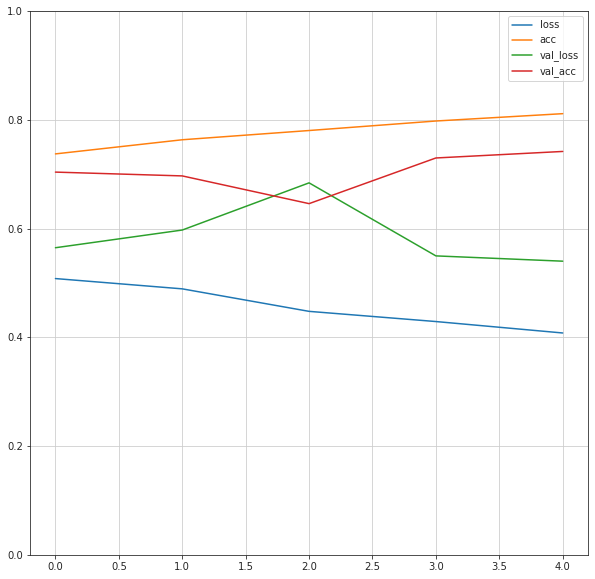

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')
pd.DataFrame(model_history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# conv_model.save('conv_')

<h3>Here i will use only the imported libs and the dir path from above model</h3>

In [13]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=-0.2,
    horizontal_flip=True
)

val_data_gen = ImageDataGenerator(rescale=1./255)

In [26]:
train_gen_1 = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

val_gen_1 = val_data_gen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
conv_model1 = models.Sequential()

conv_model1.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (150,150,3)))
conv_model1.add(layers.MaxPool2D((2,2)))

conv_model1.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
conv_model1.add(layers.MaxPool2D((2,2)))

conv_model1.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
conv_model1.add(layers.MaxPool2D((2,2)))

conv_model1.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
conv_model1.add(layers.MaxPool2D((2,2)))

conv_model1.add(layers.Flatten())
conv_model1.add(layers.Dropout(0.5))
conv_model1.add(layers.Dense(512, activation='relu'))
conv_model1.add(layers.Dense(1,activation='sigmoid'))

In [28]:
conv_model1.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [29]:
model_history1 = conv_model1.fit_generator(
    train_gen_1,
    steps_per_epoch=100,#this is no. of train examp. divided by batch size for training data 
    epochs=2,
    validation_data=val_gen_1,#this is no. of train examp. divided by batch size for validation data
    validation_steps=50
)

Epoch 1/2
100/100 [==============================] - 87s 866ms/step - loss: 0.6922 - acc: 0.5276 - val_loss: 0.6748 - val_acc: 0.5736
Epoch 2/2
100/100 [==============================] - 91s 906ms/step - loss: 0.6769 - acc: 0.5634 - val_loss: 0.6619 - val_acc: 0.5838


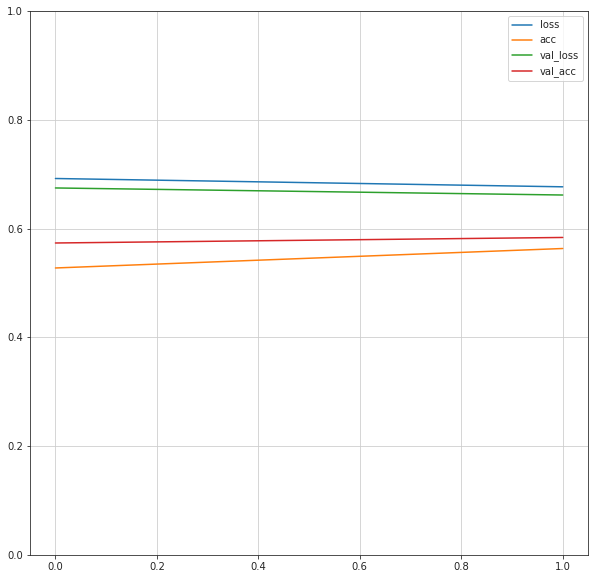

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')
pd.DataFrame(model_history1.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
# conv_model1.save('dogcat_cnn_dataAugment.h5')

In [ ]:
test_data_gen = ImageDataGenerator(rescale=1./255)
test_gen = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)
conv_model1.evaluate()